<a href="https://colab.research.google.com/github/nourelkhalawy/practical_data_science_fall_2020/blob/master/pds_session2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pima Indians Database Analysis

## Mounting Drive

In [1]:
from google.colab import drive

In [2]:
drive.mount('drive', force_remount=True)

Mounted at drive


In [3]:
cd drive/My\ Drive/pds_fall20/session_2

/content/drive/My Drive/pds_fall20/session_2


## Importing The Libraries Needed

In [44]:
#for playing with data and its stats
import pandas as pd

#for visualizing/plotting data
import seaborn as sb 
import matplotlib.pyplot as plt

#from scaling data to a mean of 0 and std of 1
from sklearn.preprocessing import StandardScaler

#for splitting data into train and test sets, 
#using k folds when training on different models, 
#and cross validation
from sklearn import model_selection

#for trying different model performance on the data
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor

#for model metrics 
from sklearn.metrics import precision_recall_fscore_support

## Dataset Context

"This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage."

-- Learning, U. (2016, October 06). Pima Indians Diabetes Database. Retrieved September 16, 2020, from https://www.kaggle.com/uciml/pima-indians-diabetes-database 

Variables
1. Pregnancies: Number of times pregnant
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. BloodPressure: Diastolic blood pressure (mm Hg)
4. SkinThickness: Triceps skin fold thickness (mm)
5. Insulin: 2-Hour serum insulin (mu U/ml)
6. BMI: Body mass index (weight in kg/(height in m)^2)
7. DiabetesPedigreeFunction: Diabetes pedigree function. A function which scores the likelihood of diabetes based on family history. It provided some data on diabetes mellitus history in relatives and the genetic relationship of those relatives to the patient.
8. Age: Age (years)
9. Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0


## Data Exploration & Cleaning

In [5]:
#reading data
data = pd.read_csv('diabetes.csv')

In [6]:
#taking a peak at the columns
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
#looking at the stats especially the min and max to see if it needs cleaning
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
#converting to data frame for easier handling
df = pd.DataFrame(data)

In [9]:
#droppig unreasonable 0 values rows from these columns
#some people choose to convert it to the median in order not to lose a lot of data
df = df.loc[(df[['Glucose','BloodPressure','SkinThickness', 'Insulin', 'BMI', 'Age']] != 0).all(axis=1)]

In [10]:
#taking another peak at the data and seeing how many rows left
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26,1
755,1,128,88,39,110,36.5,1.057,37,1
760,2,88,58,26,16,28.4,0.766,22,0
763,10,101,76,48,180,32.9,0.171,63,0


In [11]:
#ooking at the stats of the data left after cleaning
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


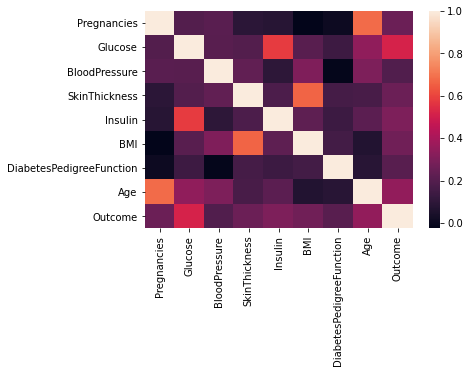

In [13]:
#understanding the correlation between the different variables
df_corr = df.corr()
sb.heatmap(df_corr, xticklabels=df_corr.columns, yticklabels=df_corr.columns)

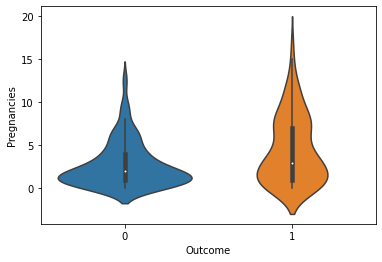

In [14]:
#understanding the distribution of the classification 
#(diabetes/no diabetes) based on each feature
sb.violinplot(x='Outcome', y='Pregnancies', data=df)

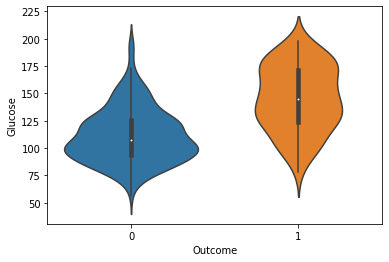

In [15]:
sb.violinplot(x='Outcome', y='Glucose', data=df)

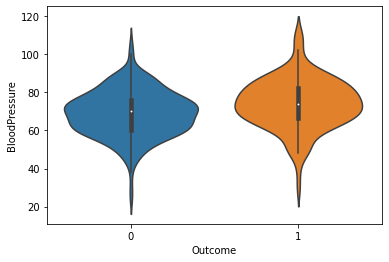

In [16]:
sb.violinplot(x='Outcome', y='BloodPressure', data=df)

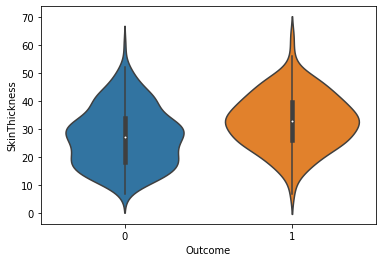

In [17]:
sb.violinplot(x='Outcome', y='SkinThickness', data=df)

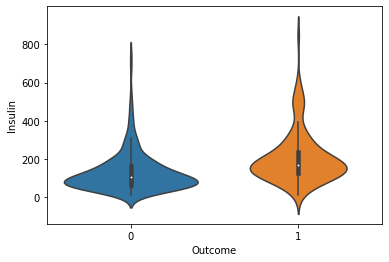

In [18]:
sb.violinplot(x='Outcome', y='Insulin', data=df)

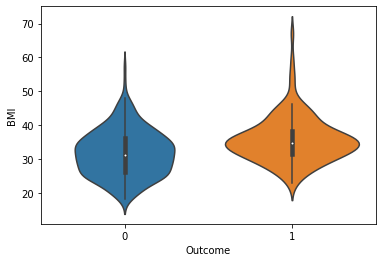

In [20]:
sb.violinplot(x='Outcome', y='BMI', data=df)

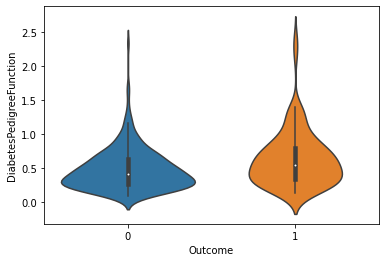

In [21]:
sb.violinplot(x='Outcome', y='DiabetesPedigreeFunction', data=df)


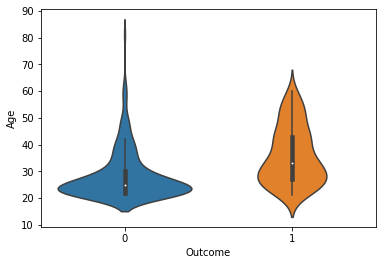

In [22]:
sb.violinplot(x='Outcome', y='Age', data=df)

## Splitting Data & Training

In [23]:
#Scaling the feature variables
labels = df.Outcome
features = df.drop('Outcome', axis = 1)
columns = features.columns
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
s_features = pd.DataFrame(scaled_features, columns = columns)

In [24]:
#splitting data into train and test sets
train_set, test_set, train_label, test_label = model_selection.train_test_split(s_features, labels, test_size=0.2, random_state=42)

In [25]:
# Prepare an array with all the algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC()))
models.append(('LSVC', LinearSVC()))
models.append(('RFC', RandomForestClassifier()))
models.append(('DTR', DecisionTreeRegressor()))

In [26]:
#Empty sets for results
results = []
models_names = []

In [27]:
#run the data on all the algorithms selected above and return accuracy
#the training set is divided into 10 to use cross validation
#the results are based on the mean of the 10 folds
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=7)
    cv_results = model_selection.cross_val_score(
      model, train_set, train_label, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    models_names.append(name)
    msg = "%s: %f (%f)" % (
        name, cv_results.mean(), cv_results.std())
    print(msg)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will ra

LR: 0.786190 (0.067894)
KNN: 0.773185 (0.066232)
NB: 0.767238 (0.049213)
SVC: 0.764012 (0.067277)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

LSVC: 0.783065 (0.068763)
RFC: 0.769960 (0.074173)
DTR: 0.725403 (0.101565)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


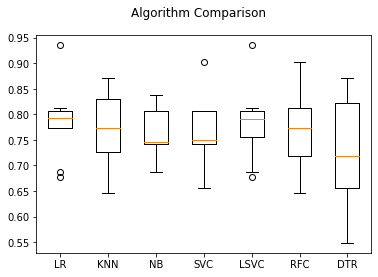

In [30]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(models_names)
plt.show()

In [32]:
#using logistic regression for further analysis
#to get a holistic accuracy of the model w/o cross validation
selected_model = LogisticRegression()
selected_model.fit(train_set, train_label)
label_pred = selected_model.predict(test_set)
print(f'Accuracy: {selected_model.score(test_set, test_label)}')

Accuracy: 0.7721518987341772


## Testing & Analyzing The Data

In [43]:
#analysis metrics
print(f"Precision_score, Recall_score, F1_score: {precision_recall_fscore_support(test_label, label_pred, average='macro')}")

Precision_score, Recall_score, F1_score: (0.749611801242236, 0.728988603988604, 0.7366666666666666, None)


Text(0.5, 0, 'Importance')

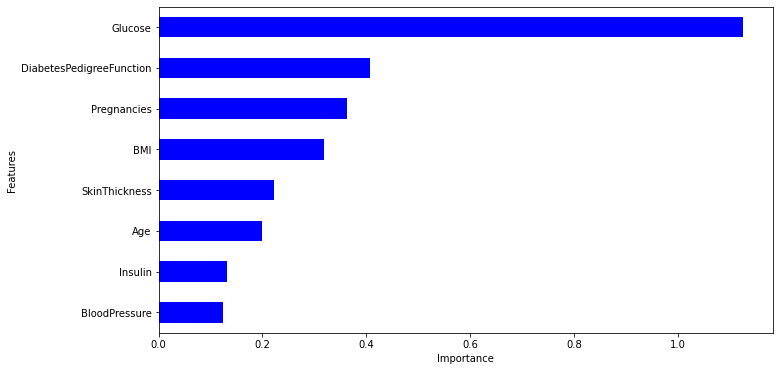

In [45]:
#feature analysis
coeff = list(selected_model.coef_[0])
labels = list(train_set.columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

## Resources


https://www.andreagrandi.it/2018/04/14/machine-learning-pima-indians-diabetes/

https://towardsdatascience.com/pima-indian-diabetes-prediction-7573698bd5fe

https://towardsdatascience.com/end-to-end-data-science-example-predicting-diabetes-with-logistic-regression-db9bc88b4d16
